# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.158957e+01     7.770344e+00
 * time: 0.002122163772583008
     1     2.759371e+01     5.813569e+00
 * time: 0.009404182434082031
     2     1.904181e+01     5.572813e+00
 * time: 0.01776599884033203
     3     1.221253e+01     3.742177e+00
 * time: 0.02591109275817871
     4     1.144228e+01     3.956478e+00
 * time: 0.032975196838378906
     5     1.039616e+01     1.718805e+00
 * time: 0.03982996940612793
     6     9.691190e+00     1.182128e+00
 * time: 0.04613518714904785
     7     9.086214e+00     1.193221e+00
 * time: 0.05245018005371094
     8     8.671945e+00     7.481734e-01
 * time: 0.05863499641418457
     9     8.444855e+00     5.382072e-01
 * time: 0.09853196144104004
    10     8.417318e+00     1.510626e+00
 * time: 0.10258007049560547
    11     8.400039e+00     1.081071e+00
 * time: 0.1063840389251709
    12     8.357963e+00     8.488295e-01
 * time: 0.11014008522033691
    13     8.245187e+00     6.489387e-01
 * tim

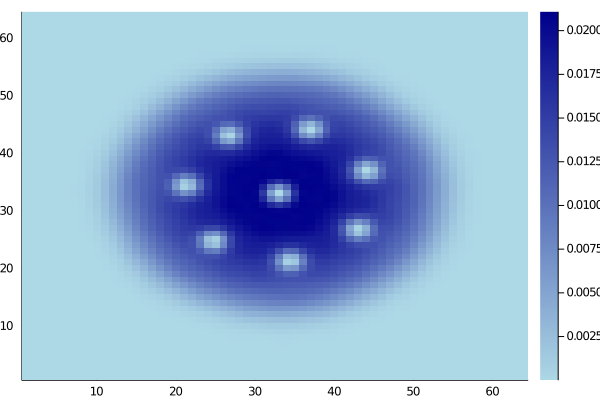

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)